In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier

In [5]:
iris_data = datasets.load_iris()

In [8]:
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
iris_data.data.shape

(150, 4)

In [12]:
iris_data.target.shape

(150,)

In [13]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

In [17]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

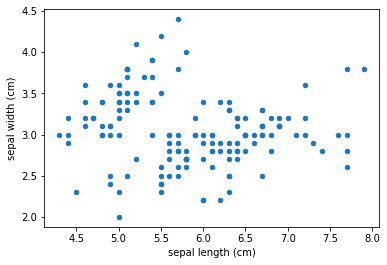

In [19]:
df_iris.plot.scatter(x='sepal length (cm)', y = 'sepal width (cm)')

In [20]:
path = "https://raw.githubusercontent.com/shobhit-nigam/knowledgeclan/main/datasets/iris.csv"

In [21]:
dfb = pd.read_csv(path)

In [22]:
dfb

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


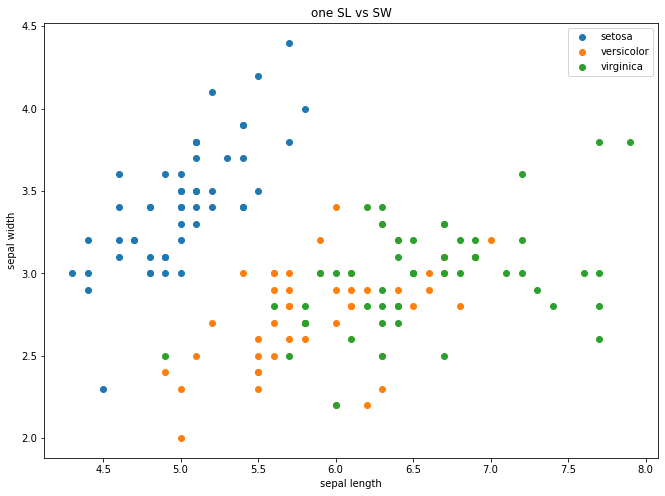

In [26]:
plt.figure(figsize=(11, 8))

for name, group in dfb.groupby('species'):
    plt.scatter(group['sepal_length'], group['sepal_width'], label=name)
    
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('one SL vs SW')
plt.legend()
plt.show()

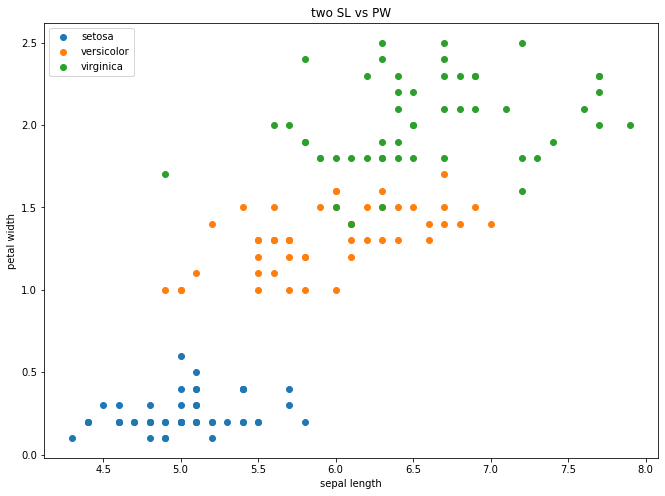

In [27]:
plt.figure(figsize=(11, 8))

for name, group in dfb.groupby('species'):
    plt.scatter(group['sepal_length'], group['petal_width'], label=name)
    
plt.xlabel('sepal length')
plt.ylabel('petal width')

plt.title('two SL vs PW')
plt.legend()
plt.show()

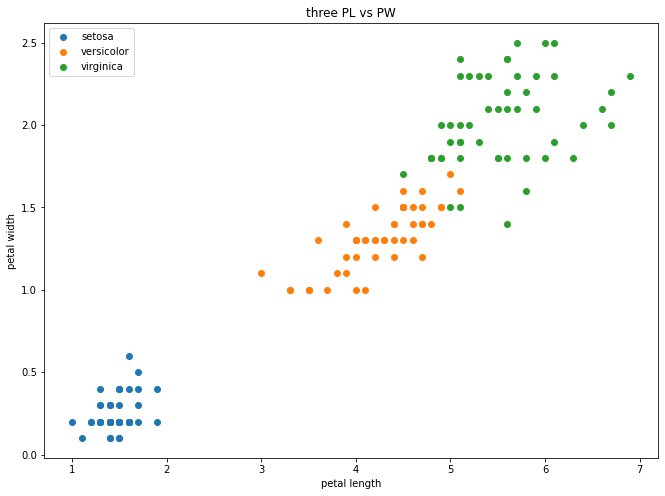

In [29]:
plt.figure(figsize=(11, 8))

for name, group in dfb.groupby('species'):
    plt.scatter(group['petal_length'], group['petal_width'], label=name)
    
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.title('three PL vs PW')
plt.legend()
plt.show()

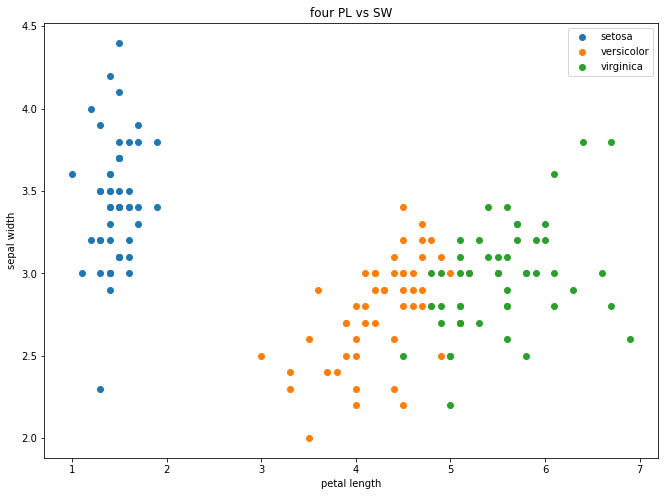

In [31]:
plt.figure(figsize=(11, 8))

for name, group in dfb.groupby('species'):
    plt.scatter(group['petal_length'], group['sepal_width'], label=name)
    
plt.xlabel('petal length')
plt.ylabel('sepal width')

plt.title('four PL vs SW')
plt.legend()
plt.show()

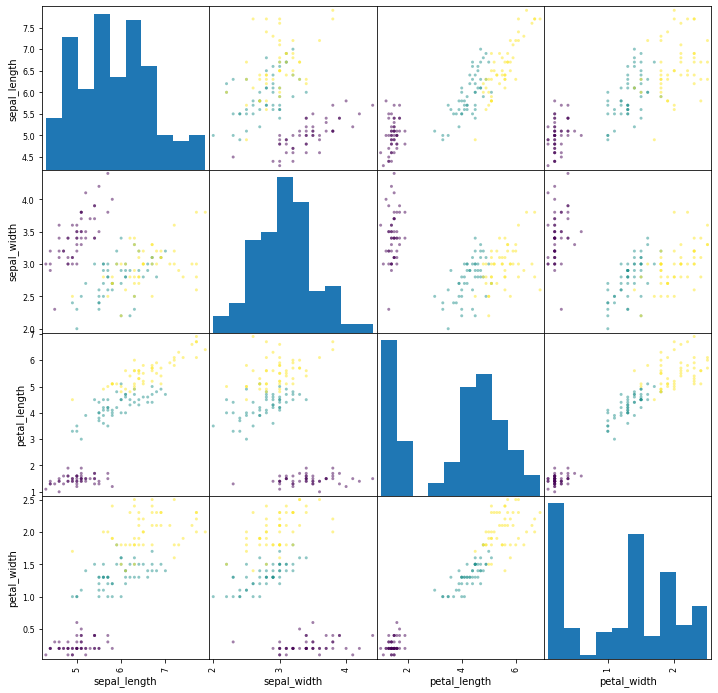

In [37]:
pd.plotting.scatter_matrix(dfb, c=iris_data.target, figsize=(12, 12))

plt.show()

In [39]:
dfc = dfb.copy()

In [41]:
list(dfc["species"].unique())

['setosa', 'versicolor', 'virginica']

In [44]:
dictx = {'setosa':0, 'versicolor':1, 'virginica':2}

dfc["species"] = dfc["species"].replace(dictx)

In [45]:
dfc

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
